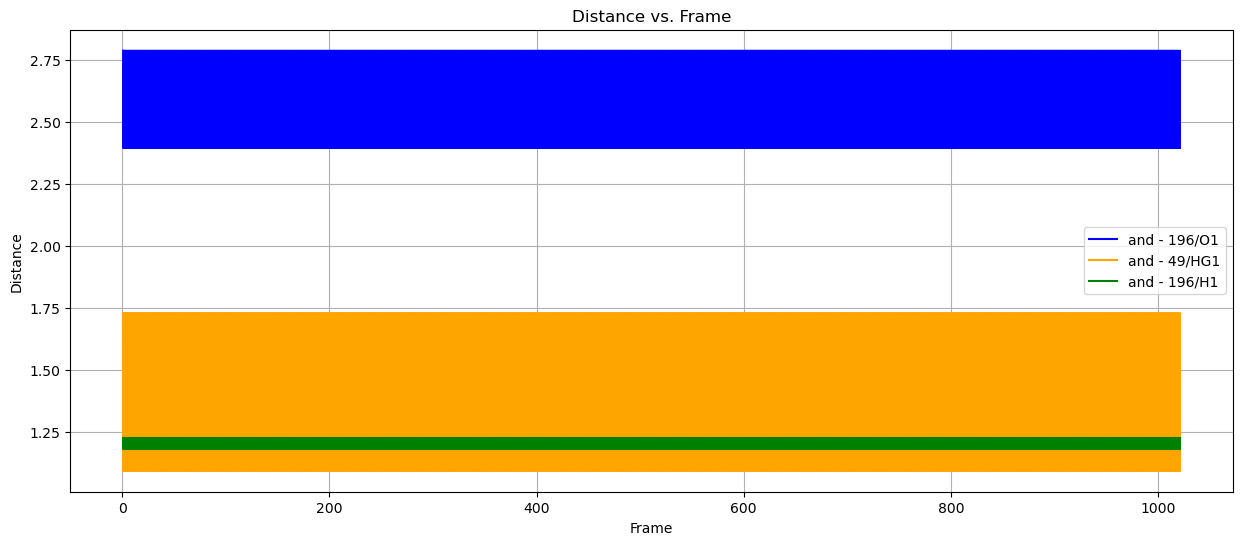

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the file into a DataFrame
with open('distances.txt', 'r') as file:
    lines = file.readlines()

data = {'Frame': [], 'Atom Pair': [], 'Distance': []}

for line in lines:
    if line.startswith('Frame'):
        frame_number = line.split()[1].strip(':')
    elif line.startswith('Distance between'):
        parts = line.split(':')
        atoms = parts[0].split()[3:5]
        atom1_name = atoms[0].split('`')[-1]
        atom2_name = atoms[1].split('`')[-1]
        distance = float(parts[1])
        
        data['Frame'].append(frame_number)
        data['Atom Pair'].append(f"{atom1_name} - {atom2_name}")
        data['Distance'].append(distance)

df = pd.DataFrame(data)

# Convert 'Frame' column to numeric type
df['Frame'] = pd.to_numeric(df['Frame'])

# Plot the data
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']  # Specify colors for each line
for i, atom_pair in enumerate(df['Atom Pair'].unique()):
    df_atom_pair = df[df['Atom Pair'] == atom_pair]
    plt.plot(df_atom_pair['Frame'], df_atom_pair['Distance'], label=atom_pair, color=colors[i])

plt.xlabel('Frame')
plt.ylabel('Distance')
plt.title('Distance vs. Frame')
plt.legend()
plt.grid(True)
plt.show()